162 ms ± 5.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
173 µs ± 3.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


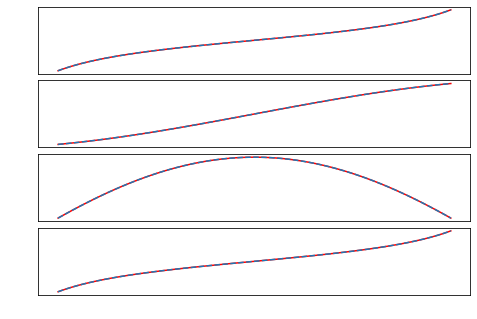

In [4]:
import numpy
import math as mh
import matplotlib.pyplot as plt


def sinus(x,iter):
    n=0
    s=0
    while n<iter+1 :
       s+= (-1)**n * x**(2*n+1)/mh.factorial(2*n+1)
       n+=1
    return s
def cosi(x,iter):
    n=0
    s=0
    while n < iter + 1:
        s+=(-1)**n*x**(2*n)/mh.factorial(2*n)
        n+=1
    return s

def ber_number(n):
    if n==0:
        return 1

    S=-1/(n+1)
    k=1
    s=0
    while k<= n:
          s+=mh.comb(n+1,k+1)*ber_number(n-k)
          k+=1
    return S*s


def tan(x,iter):
    """
    Вычисление тангенс при помощи частичного суммирования тангенса
    ряда Тейлора для окрестности 0
    """
    n=1
    s=0
    while n<=iter:
       s+=(ber_number(2*n)*((-4)**n) *(1-4**n)*(x**(2*n-1)))/(mh.factorial(2*n))
       n+=1
    return s

def super_tan(x,iter):
    """"
    Вычисление тангенс при помощи частичного суммирования синуса и косинуса
    ряда Тейлора для окрестности 0
    """
    return sinus(x, iter)/cosi(x,iter)

x = numpy.linspace(-numpy.pi/3 ,numpy.pi/3 , 100) 

fig, axes = plt.subplots(4)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.1)
fig.set_facecolor('white')  
for a in range(0,4):
    axes[a].tick_params(axis='x', colors='white')
    axes[a].tick_params(axis='y', colors='white')
    
axes[0].plot(x,numpy.tan(x), color='red')
axes[1].plot(x,numpy.sin(x), color='red') #
axes[2].plot(x,numpy.cos(x), color='red') #
axes[3].plot(x,numpy.tan(x), color='red') #
iterration = 9
axes[0].plot(x, tan(x, iterration),'--')
axes[1].plot(x, sinus(x, iterration),'--')
axes[2].plot(x, cosi(x, iterration),'--')
axes[3].plot(x, super_tan(x,iterration),'--')

#красная линия встроенная функция
#синяя пунктирная линия  функция через частичное суммирование ряда тейлора
# 1 график это тангенс через ряд тейлора тангенса
# 2 график синус через ряд тейлора
# 3 график косинус через ряд тейлора
# 4 график тангенс через ряды синус делить на косинус
#как видно из графиков выгоднее считать тангенс вторым способом тк точнее и быстрее 
%timeit  tan(x, iterration)
%timeit  super_tan(x, iterration)


